In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import gaussian1d

In [2]:
t=np.linspace(-10,10,1000)

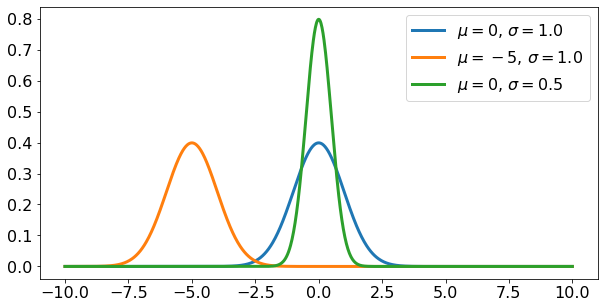

In [3]:
plt.figure(figsize=(10,5))
plt.plot(t,gaussian1d(t,0,1),linewidth=3,label=r'$\mu=0$, $\sigma=1.0$')
plt.plot(t,gaussian1d(t,-5,1),linewidth=3,label=r'$\mu=-5$, $\sigma=1.0$')
plt.plot(t,gaussian1d(t,0,.5),linewidth=3,label=r'$\mu=0$, $\sigma=0.5$')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

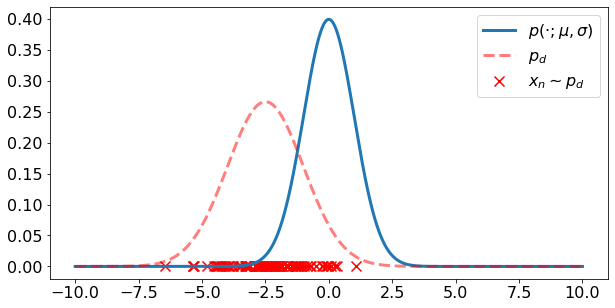

In [4]:
x=np.random.normal(-2.5,1.5,size=(100,))
plt.figure(figsize=(10,5))
plt.plot(t,gaussian1d(t,0,1),linewidth=3,label=r'$p(\cdot;\mu,\sigma)$')
plt.scatter(x,np.zeros_like(x),c='r',marker='x',s=100,label=r'$x_n\sim p_{d}$')
plt.plot(t,gaussian1d(t,-2.5,1.5),'--r',linewidth=3,alpha=.5,label=r'$p_{d}$')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [5]:
mean=[-3.5,-1.5]
cov=[[2.,.7],[.7,1.75]]
x=np.random.multivariate_normal(mean,cov,size=100)

In [6]:
from scipy.stats import multivariate_normal
X,Y=np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))

In [7]:
z_d=multivariate_normal.pdf(np.stack([X.reshape(-1),Y.reshape(-1)],1),mean=mean,cov=cov)
z_d=z_d.reshape(100,100)

z=multivariate_normal.pdf(np.stack([X.reshape(-1),Y.reshape(-1)],1),mean=[3.,2.],cov=[[2.,-1.],[-1.,2.]])
z=z.reshape(100,100)

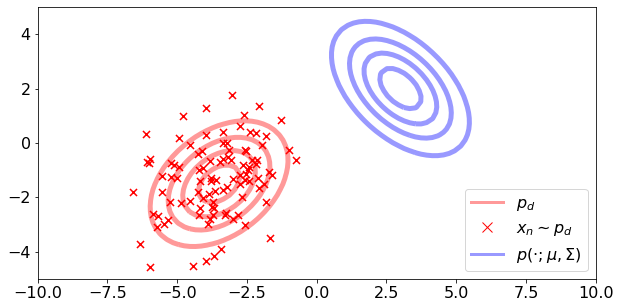

In [8]:
from matplotlib.lines import Line2D
custom_legend = [Line2D([0], [0], color='r',alpha=.4, lw=3,label=r'$p_{d}$'),
                Line2D([0], [0], marker='x', color='w',markeredgecolor='r', markersize=10,label=r'$x_n\sim p_{d}$'),
                Line2D([0], [0], color='b',alpha=.4, lw=3,label=r'$p(\cdot;\mu,\Sigma)$')]

plt.figure(figsize=(10,5))
plt.contour(X, Y, z_d, 5, colors='r', linewidths=5, alpha=.4)
plt.scatter(x[:,0],x[:,1],c='r',marker='x',s=50)
plt.contour(X, Y, z, 5, colors='b', linewidths=5, alpha=.4)
plt.xlim([-10,10])
plt.ylim([-5,5])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(handles=custom_legend,fontsize=16,loc='lower right')
plt.show()

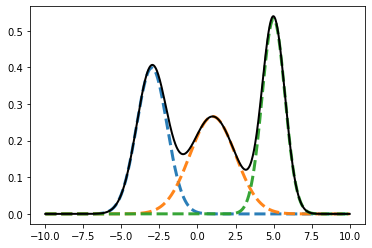

In [9]:
means=[-3.,1.,5.]
stds =[1.,1.5,.75]
gmm=np.zeros_like(t)
for i in range(3):
    g =gaussian1d(t,means[i],stds[i])
    gmm+=g
    plt.plot(t,g,'--',linewidth=3,alpha=.95)
plt.plot(t,gmm,'k',linewidth=2)

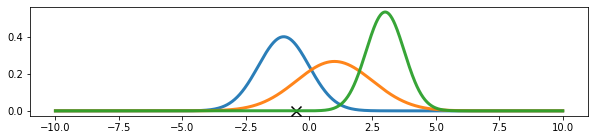

In [10]:
means=[-1.,1.,3.]
stds =[1.,1.5,.75]
gmm=np.zeros_like(t)
fig=plt.figure(figsize=(10,2))
for i in range(3):
    g =gaussian1d(t,means[i],stds[i])
    gmm+=g
    plt.plot(t,g,linewidth=3,alpha=.95)
plt.scatter([-.5],[0],c='k',marker='x',s=100)